In [1]:
import tensorflow as tf
import numpy as np
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from pulearn import (
    MultilayerPerceptron,
    WeightedUnlabelledMultilayerPerceptron,
    UnlabelledExponentialLossMultilayerPerceptron
)

from pulearn.utils import fit_and_plot, synthesize_pu_labels

In [2]:
# Network Parameters
n_input = 2
n_classes = 2

In [3]:
X, y = datasets.make_classification(n_samples=800, n_features=2, n_redundant=0, n_informative=2, random_state=0)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.5, random_state=42)
Y_train = np.eye(n_classes)[y_train]
print(X_train.shape)
print(Y_train.shape)

(400, 2)
(400, 2)


Using [ 1.  1.]
Epoch: 0001 cost= 0.908854917
Epoch: 0011 cost= 0.267402668
Epoch: 0021 cost= 0.242840007
Epoch: 0031 cost= 0.224595621
Epoch: 0041 cost= 0.216505628
Epoch: 0051 cost= 0.215240240
Epoch: 0061 cost= 0.212897811
Epoch: 0071 cost= 0.209758397
Epoch: 0081 cost= 0.208856486
Epoch: 0091 cost= 0.208200928
Using [ 1.  1.]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

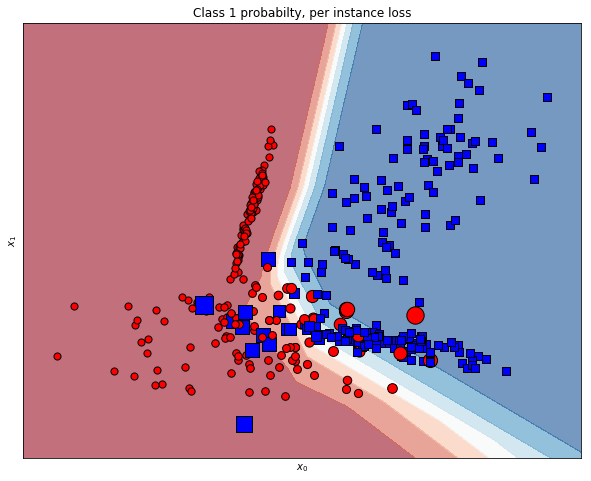

In [4]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=1e-2,
                          alpha=0,
                          epochs=100,
                          verbose=True)
fit_and_plot(X_train, Y_train, mp, marker_size="loss")

# PU

In [6]:
Y_train_pu = synthesize_pu_labels(Y_train, random_state=42)

Using [ 1.          2.82857143]
Epoch: 0001 cost= 1.071782440
Epoch: 0011 cost= 0.805576220
Epoch: 0021 cost= 0.749473363
Epoch: 0031 cost= 0.744098753
Epoch: 0041 cost= 0.739156961
Epoch: 0051 cost= 0.736122787
Epoch: 0061 cost= 0.732642516
Epoch: 0071 cost= 0.729662880
Epoch: 0081 cost= 0.726417661
Epoch: 0091 cost= 0.723499089
Using [ 1.          2.82857143]
Using [ 1.          2.82857143]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

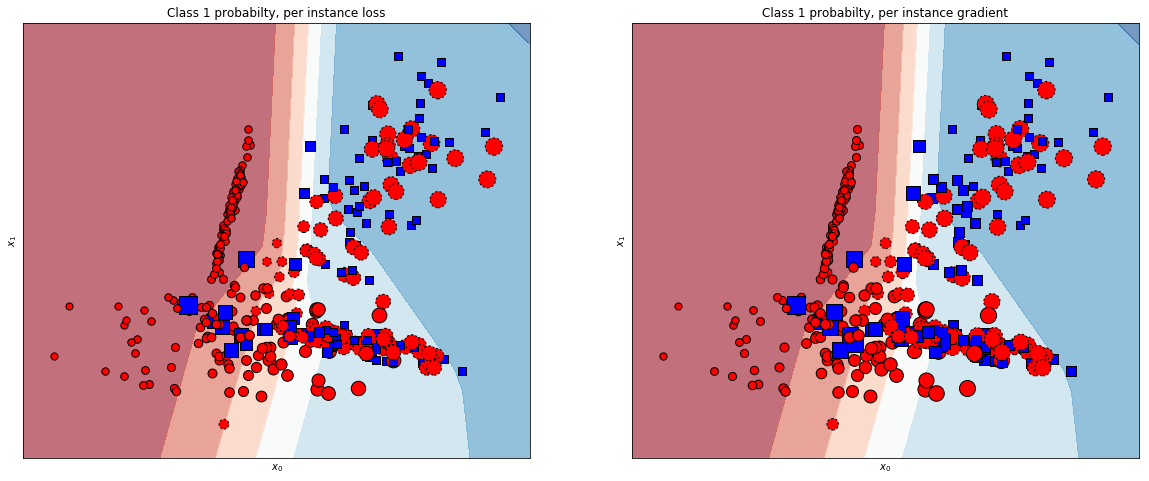

In [8]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=100,
                          class_weight="balanced",
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), mp, marker_size=["loss", "gradient"], Y_true=Y_train)

Using [ 1.          2.82857143]
Re-weighing to [ 1.          5.65714286]
Epoch: 0001 cost= 1.311386049
Epoch: 0011 cost= 1.008327171
Epoch: 0021 cost= 0.998031199
Epoch: 0031 cost= 0.985314876
Epoch: 0041 cost= 0.976230070
Epoch: 0051 cost= 0.971165076
Epoch: 0061 cost= 0.964674428
Epoch: 0071 cost= 0.957375377
Epoch: 0081 cost= 0.949826822
Epoch: 0091 cost= 0.946599826
Using [ 1.          2.82857143]
Re-weighing to [ 1.          5.65714286]
Using [ 1.          2.82857143]
Re-weighing to [ 1.          5.65714286]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

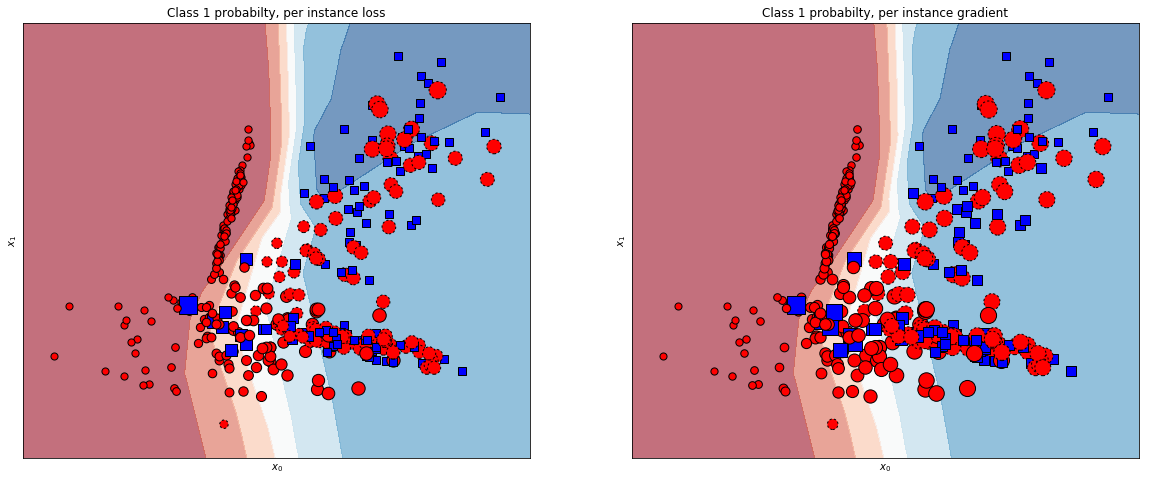

In [10]:
mp = WeightedUnlabelledMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=100,
                          class_weight="balanced",
                          unlabelled_weight={0:0.5, 1:1},
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), mp, marker_size=["loss", "gradient"], Y_true=Y_train)

Using [ 1.  1.]
Epoch: 0001 cost= 0.554769292
Epoch: 0011 cost= 0.480307423
Epoch: 0021 cost= 0.423604615
Epoch: 0031 cost= 0.387647912
Epoch: 0041 cost= 0.361406282
Epoch: 0051 cost= 0.347663842
Epoch: 0061 cost= 0.339051798
Epoch: 0071 cost= 0.328410164
Epoch: 0081 cost= 0.323841397
Epoch: 0091 cost= 0.321160831
Epoch: 0101 cost= 0.319313332
Epoch: 0111 cost= 0.317775466
Epoch: 0121 cost= 0.315593682
Epoch: 0131 cost= 0.313354649
Epoch: 0141 cost= 0.310759373
Epoch: 0151 cost= 0.308764361
Epoch: 0161 cost= 0.306422777
Epoch: 0171 cost= 0.305013157
Epoch: 0181 cost= 0.303579859
Epoch: 0191 cost= 0.302012544
Using [ 1.  1.]
Using [ 1.  1.]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

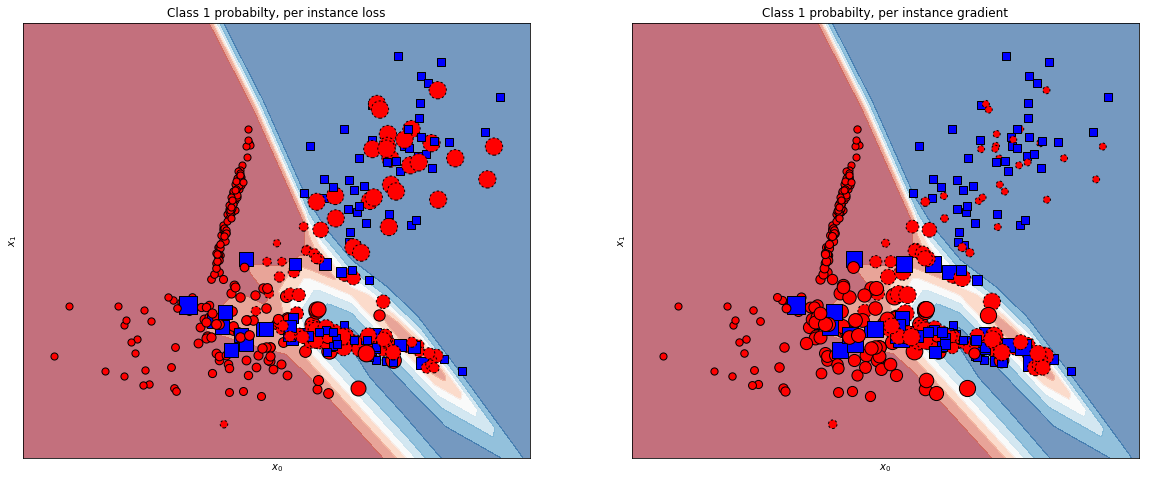

In [9]:
uelmp = UnlabelledExponentialLossMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=200,
                          class_weight=None,
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), uelmp, marker_size=["loss", "gradient"], Y_true=Y_train)

Using [ 1.          2.82857143]
Epoch: 0001 cost= 1.770504087
Epoch: 0011 cost= 0.744967103
Epoch: 0021 cost= 0.648121357
Epoch: 0031 cost= 0.487068862
Epoch: 0041 cost= 0.440232471
Epoch: 0051 cost= 0.431794532
Epoch: 0061 cost= 0.428994201
Epoch: 0071 cost= 0.427242130
Epoch: 0081 cost= 0.426192410
Epoch: 0091 cost= 0.425004736
Epoch: 0101 cost= 0.423926622
Epoch: 0111 cost= 0.423231237
Epoch: 0121 cost= 0.422254495
Epoch: 0131 cost= 0.420985095
Epoch: 0141 cost= 0.419941708
Epoch: 0151 cost= 0.418679968
Epoch: 0161 cost= 0.417206846
Epoch: 0171 cost= 0.415779993
Epoch: 0181 cost= 0.413432971
Epoch: 0191 cost= 0.411028050
Using [ 1.          2.82857143]
Using [ 1.          2.82857143]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

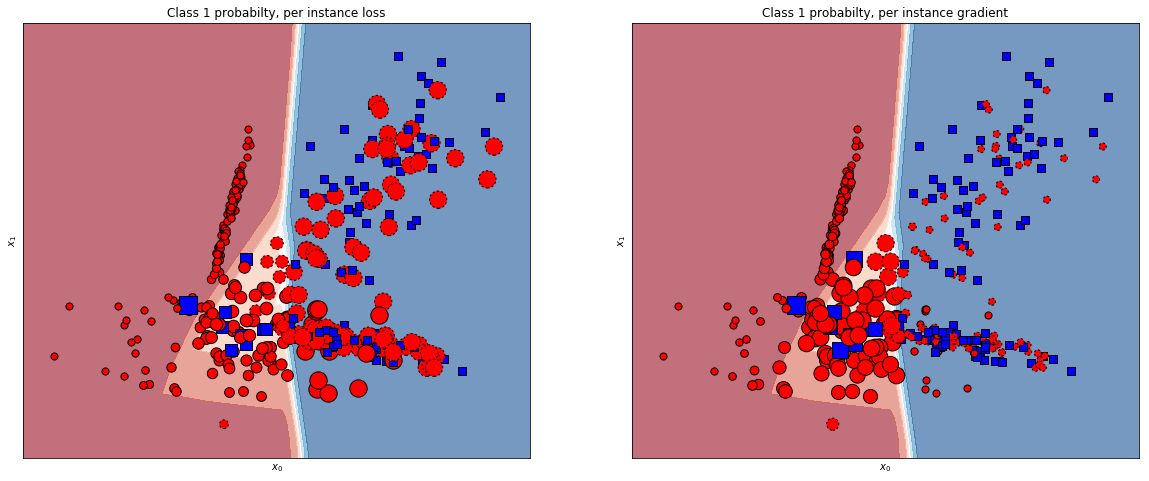

In [11]:
uelmp = UnlabelledExponentialLossMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=200,
                          class_weight="balanced",
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), uelmp, marker_size=["loss", "gradient"], Y_true=Y_train)